In [1]:
pip install numpy pandas matplotlib seaborn plotly folium scipy

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached folium-0.17.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached scipy-1.14.0-cp312-cp312-macosx_14_0_x86_64.whl.metadata (60 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2024.6.0-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.0 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 20.3 MB/s eta 0:00:0000:0100:01
Using cached folium-0.17.0-py2.py3

In [2]:
import itertools
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly  # Para ver la versión
import plotly.express as px
import folium

In [4]:
import scipy

In [5]:
# LEER CSV 
ocio = pd.read_csv("ocio_españa_limpio.csv")

In [6]:
df = ocio.copy()

In [7]:
df.columns

Index(['Año', 'Mes', 'Comunidad', 'Provincia', 'Nro entradas',
       'Cantidad visitas', 'Gasto total', 'Precio medio',
       'Cantidad transacciones', 'Tasa de conversion'],
      dtype='object')

## Resumen estadístico de las variables numéricas.
- Distribución de Nro. entradas, cantidad visitas, gasto total, precio medio y cantidad de transacciones.

In [8]:
def plot_variable_distribution(df_entradas):
    for column in df_entradas.columns:
        if pd.api.types.is_numeric_dtype(df_entradas[column]):
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))

            # Histograma con KDE
            sns.histplot(df_entradas[column].dropna(), kde=True, ax=axes[0])
            axes[0].set_title(f'Histograma y KDE de {column}')

            # Boxplot
            sns.boxplot(x=df_entradas[column], ax=axes[1])
            axes[1].set_title(f'Boxplot de {column}')

            plt.tight_layout()
            plt.show()
        elif pd.api.types.is_categorical_dtype(df_entradas[column]) or df_entradas[column].dtype == 'O':
            cardinalidad = df_entradas[column].nunique()

            if cardinalidad <= 5:
                fig, axes = plt.subplots(1, 2, figsize=(12, 5))

                # Gráfico de barras
                sns.countplot(y=df_entradas[column], order=df_entradas[column].value_counts().index, ax=axes[0])
                axes[0].set_title(f'Gráfico de Barras de {column}')

                # Gráfico de dona
                counts = df_entradas[column].value_counts()
                percentages = counts / counts.sum() * 100
                wedges, texts, autotexts = axes[1].pie(percentages, labels=percentages.index, autopct='%.1f%%', startangle=140)
                for autotext in autotexts:
                    autotext.set_color('white')
                    autotext.set_weight('bold')
                axes[1].set_title(f'Gráfico de Dona de {column}')
                axes[1].axis('equal')  # Asegurar que el gráfico de dona sea circular

                plt.tight_layout()
                plt.show()
            elif cardinalidad <= 15:
                fig, ax = plt.subplots(figsize=(8, 5))

                # Gráfico de barras
                sns.countplot(y=df_entradas[column], order=df_entradas[column].value_counts().index, ax=ax)
                ax.set_title(f'Gráfico de Barras de {column}')

                plt.tight_layout()
                plt.show()

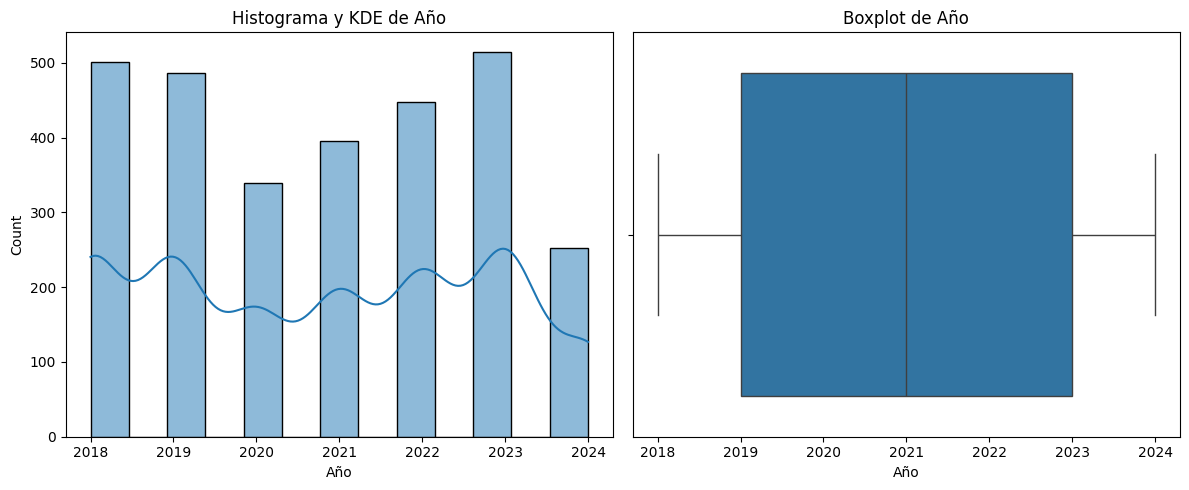

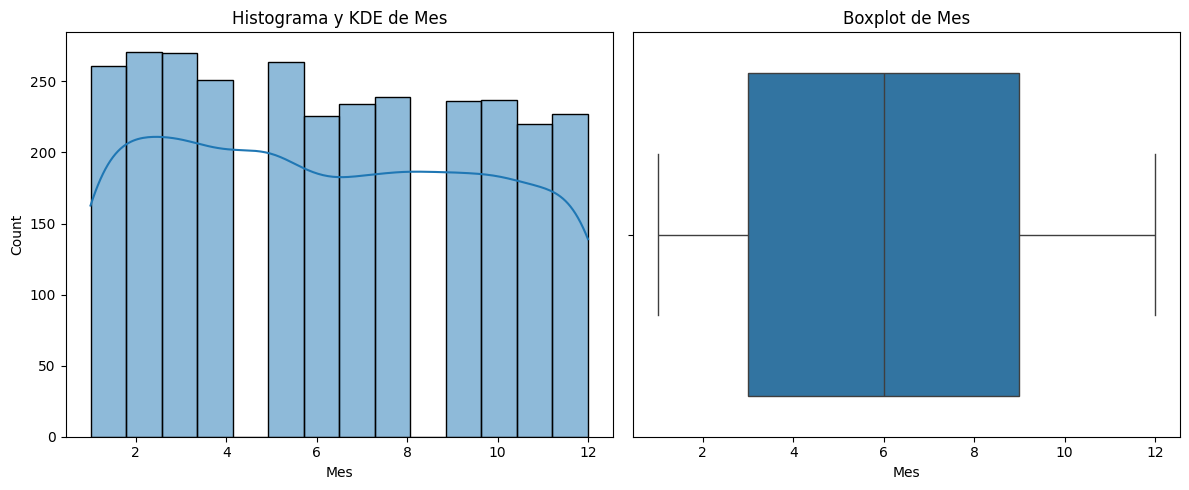

/var/folders/_1/gr45vy8j789d543r1gllsf280000gn/T/ipykernel_2607/4228987555.py:16: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df_entradas[column]) or df_entradas[column].dtype == 'O':


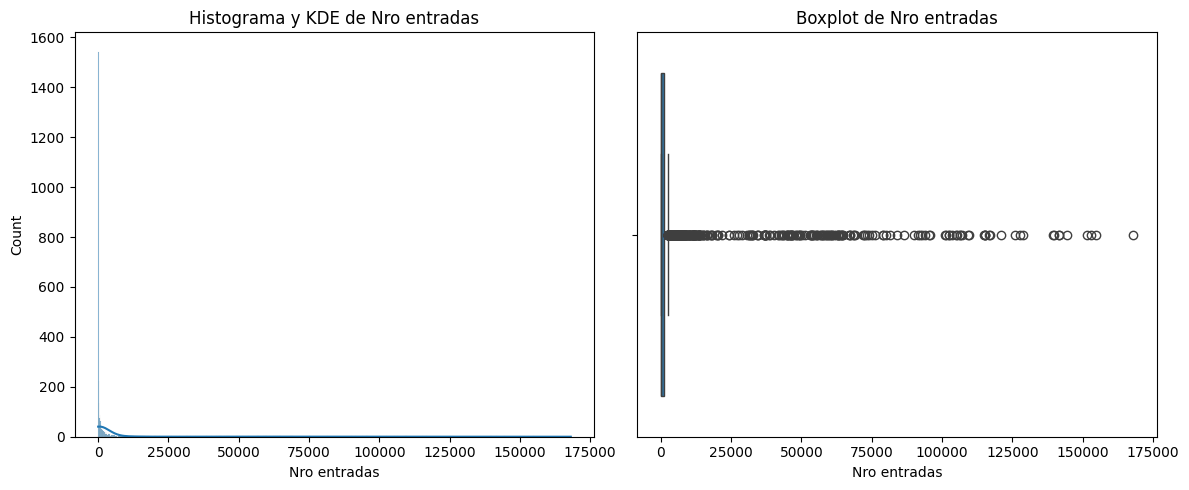

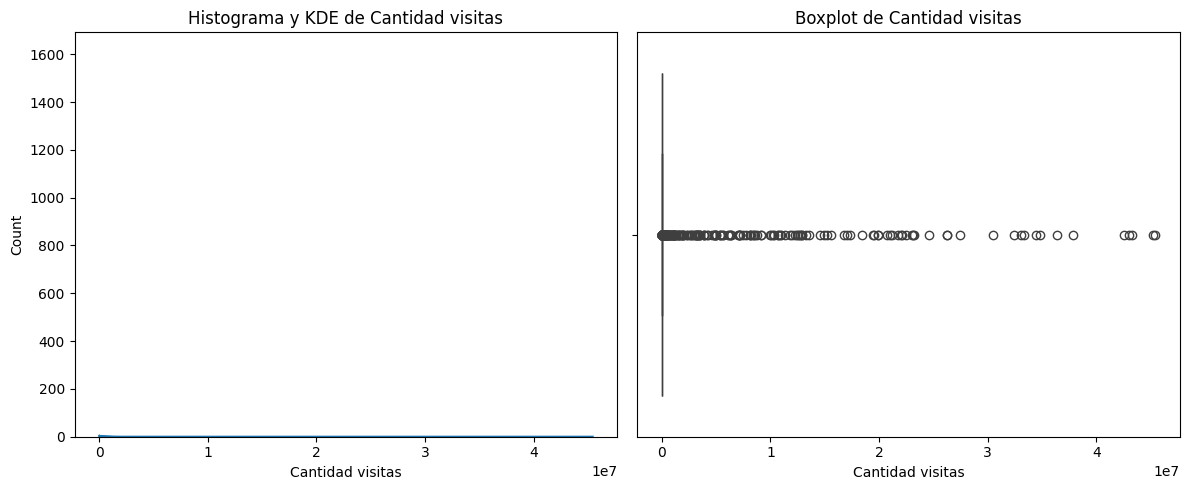

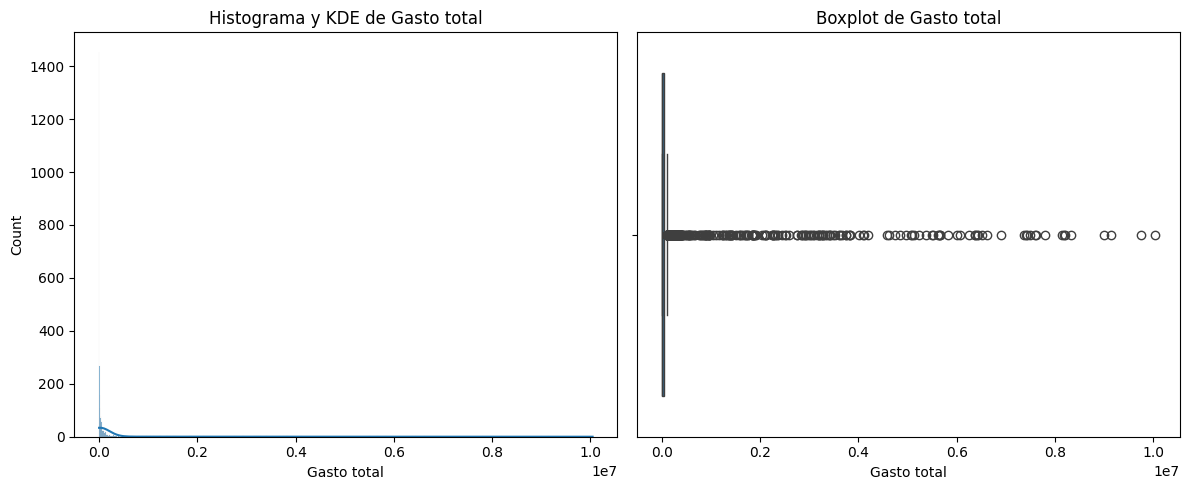

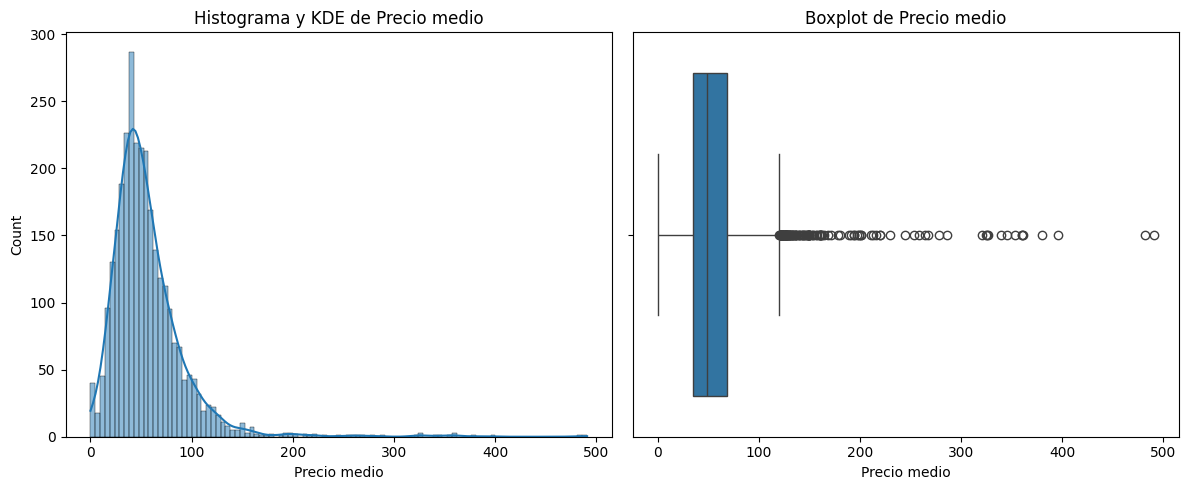

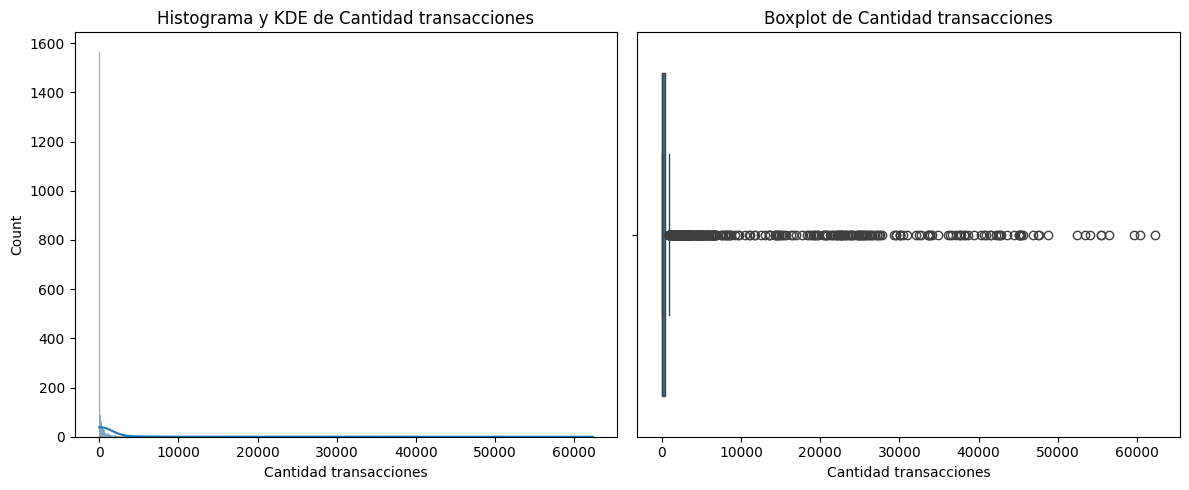

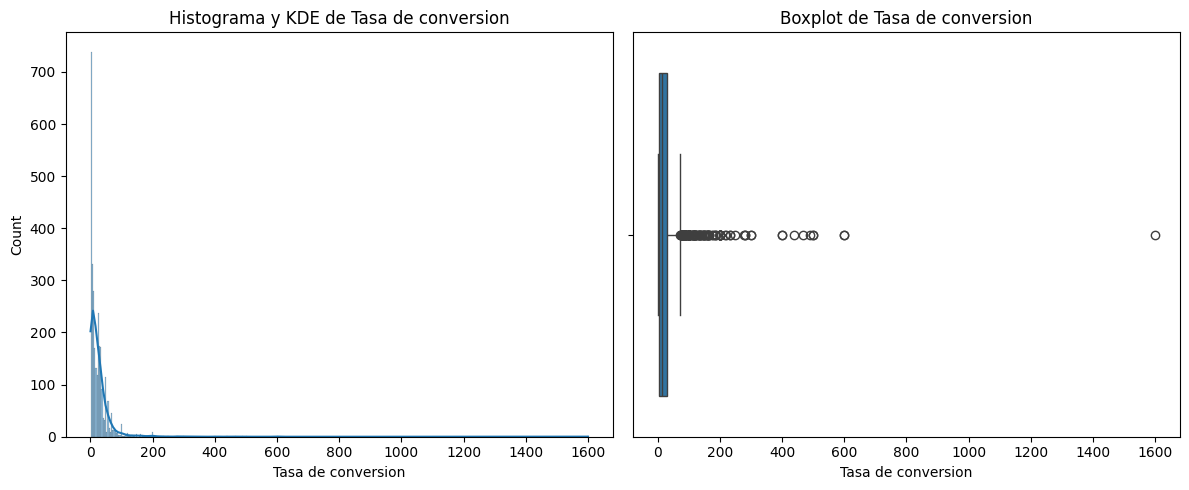

In [9]:
plot_variable_distribution(df)

In [10]:
df_agrupada = df.groupby('Comunidad')[[ 'Nro entradas',
       'Cantidad visitas', 'Gasto total', 'Precio medio',
       'Cantidad transacciones', 'Tasa de conversion']].sum()

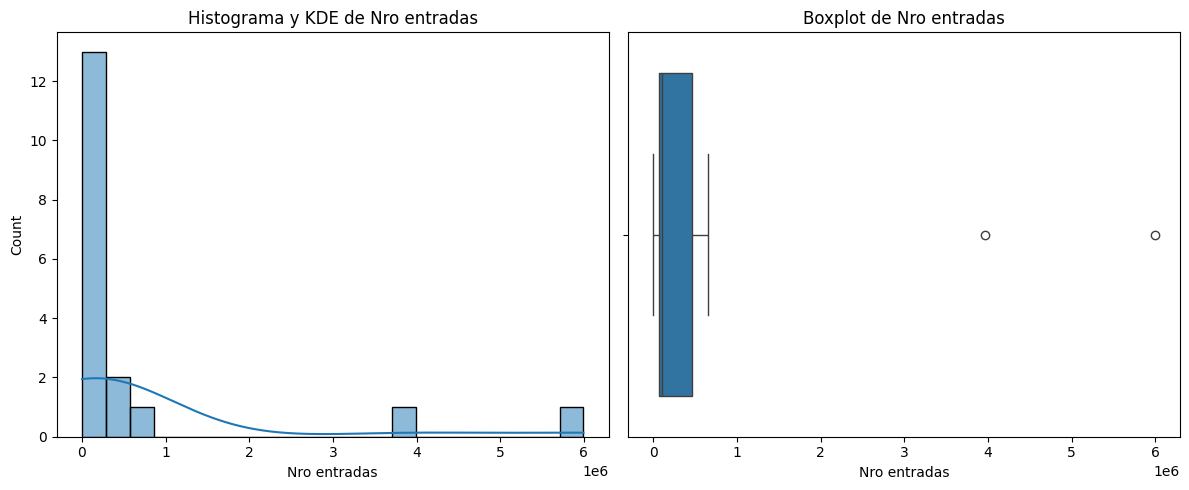

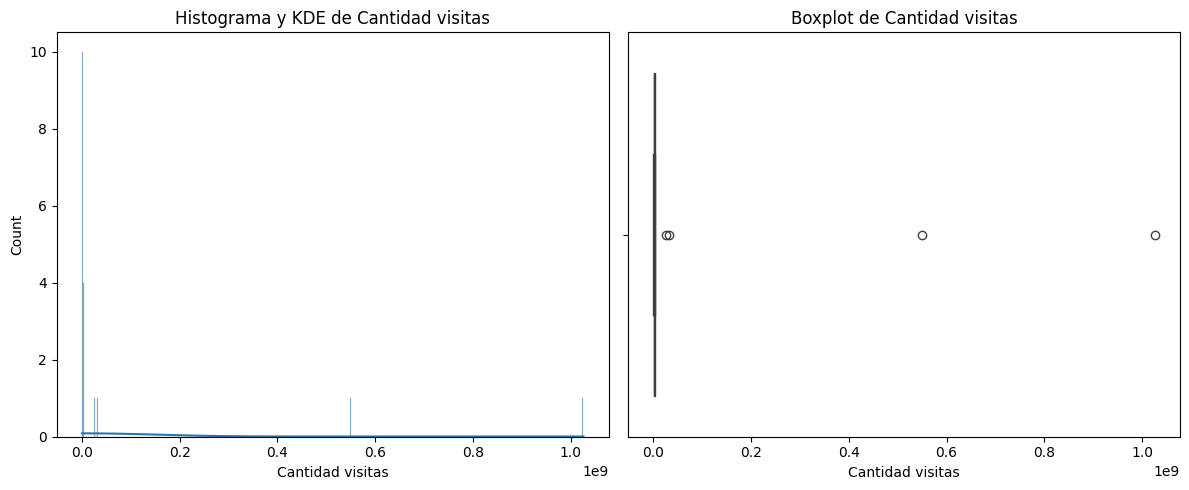

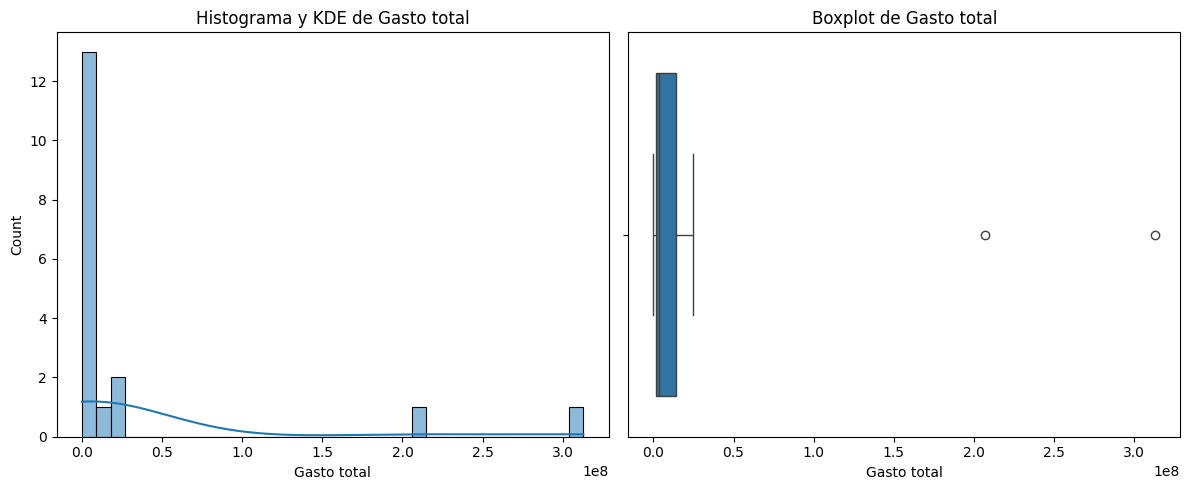

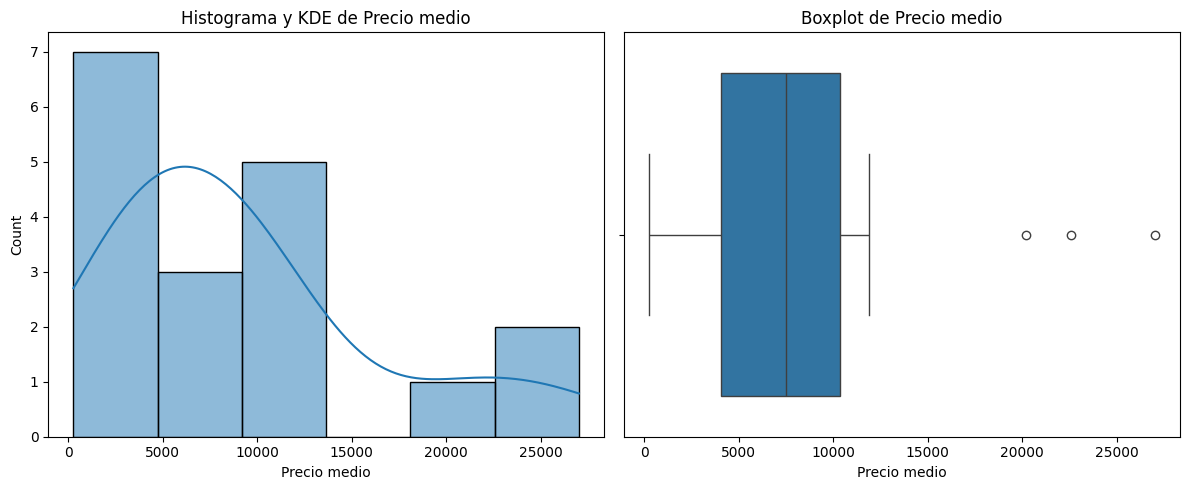

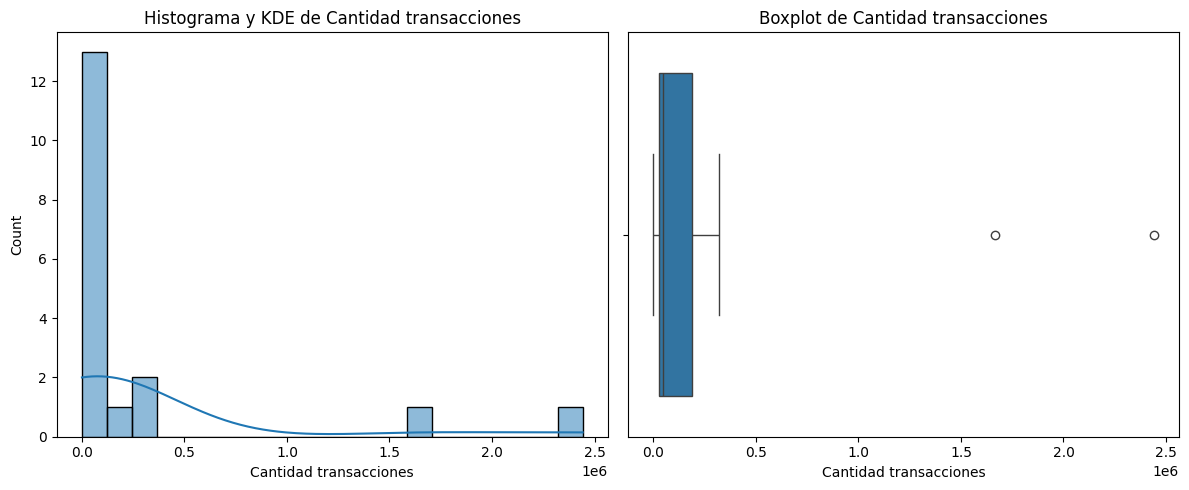

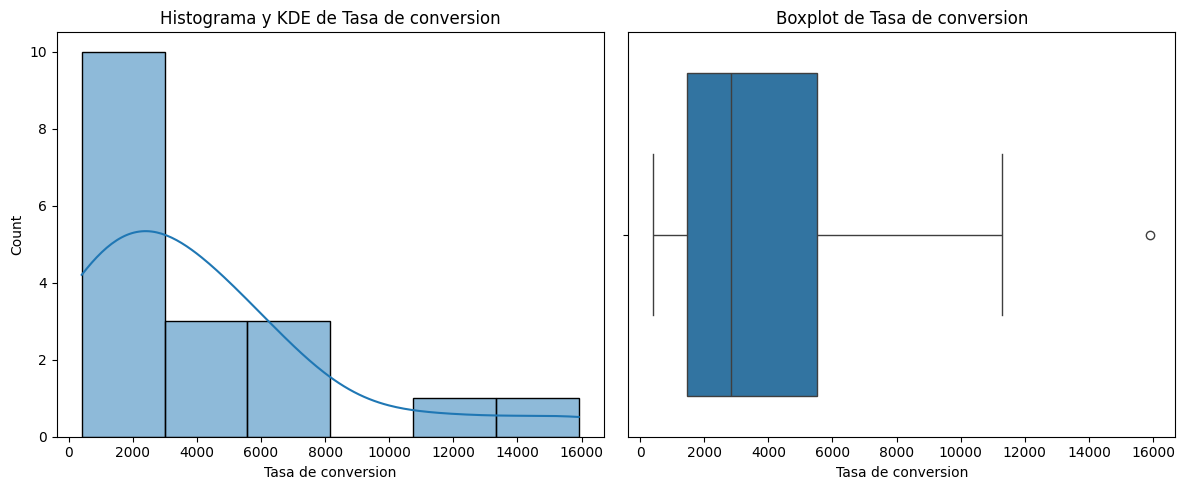

In [11]:
plot_variable_distribution(df_agrupada)

## Tendencias Temporales:

- Analizar las tendencias anuales y mensuales del número de entradas vendidas, número de visitas a las páginas web, y gasto total efectuado en la compra.
- Identificar posibles estacionalidades.

In [12]:
df = df.rename(columns={'Año': 'Year', 'Mes': 'Month'})

df['fecha'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

temporal_data = df.groupby('fecha').sum()[['Nro entradas', 'Cantidad visitas', 'Gasto total']]

In [13]:
pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install ipykernel


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Tendencia de Nro entradas', 'Tendencia de Cantidad visitas', 'Tendencia de Gasto total'))

fig.add_trace(
    go.Scatter(x=temporal_data.index, y=temporal_data['Nro entradas']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=temporal_data.index, y=temporal_data['Cantidad visitas'], name='Cantidad visitas'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=temporal_data.index, y=temporal_data['Gasto total'], name='Gasto total'),
    row=3, col=1
)

fig.update_layout(
    height=800,  # Altura de la figura
    title_text="Tendencias Temporales",
    showlegend=False  # Ocultar la leyenda
)

# Mostrar la figura
fig.show()

*Análisis de tendencia en Nro de entradas:*

Se observa que los picos de entradas se repiten anualmente debido a la estacionalidad, influenciada por las vacaciones de verano, invierno, festivos, entre otros. La tendencia más baja se registra durante la época de pandemia, con un repunte notable a finales de 2020.

*Análisis de tendencias en visitas a páginas:*

Existe una ligera diferencia entre las visitas a páginas y el gráfico de compra de entradas. Aunque se aprecia un repunte similar entre 2021 y mediados de 2022, no es tan consistente como en otros años, como 2019 o 2020.

*Analisis de gastos:*

La gráfica de gastos, por otro lado, muestra una correlación muy similar a la de la venta de entradas, excepto en 2024. Esto sugiere que, aunque se han vendido más entradas, el gasto ha disminuido debido a variaciones en precios o a subvenciones aplicadas a las entradas durante este año.

In [16]:
resultado1 = df.groupby('Year')['Nro entradas'].sum()

In [17]:
resultado1

Year
2018    2249964
2019    2224558
2020     822511
2021    1518111
2022    1858338
2023    2506730
2024    1543109
Name: Nro entradas, dtype: int64

In [18]:
resultado = df.groupby('Year')['Cantidad visitas'].sum()

In [19]:
resultado

Year
2018    455311372
2019    457604181
2020    149564464
2021    171362589
2022    237577680
2023    177407576
2024      4309173
Name: Cantidad visitas, dtype: int64

### Tendencia de compra agrupada por meses

In [20]:
# Grouping by month
month_entradas = df.groupby('Month')[['Gasto total', 'Nro entradas']].sum().reset_index()

# Create bar plot for GASTO_TOTAL
fig = px.bar(month_entradas, x='Month', y='Gasto total', title='Gasto Total y Entradas por Mes',
             labels={'Month': 'Mes', 'Gasto total': 'Gasto Total'})

# Add scatter plot for ENTRADAS
fig.add_scatter(x=month_entradas['Month'], y=month_entradas['Nro entradas'], mode='lines+markers', name='Entradas',
                marker=dict(color='salmon', size=10), yaxis='y2')

# Update layout to add secondary y-axis
fig.update_layout(
    yaxis2=dict(
        title='Entradas',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1),
   
)

fig.show()

In [21]:
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Agrupar por YearMonth
month_entradas = df.groupby('YearMonth')[['Gasto total', 'Nro entradas']].sum().reset_index()

# Crear gráfico de barras para GASTO_TOTAL
fig = px.bar(month_entradas, x='YearMonth', y='Gasto total', title='Gasto Total y Entradas por Mes',
             labels={'YearMonth': 'Mes y Año', 'Gasto total': 'Gasto Total'})

# Añadir gráfico de dispersión para ENTRADAS
fig.add_scatter(x=month_entradas['YearMonth'], y=month_entradas['Nro entradas'], mode='lines+markers', name='Entradas',
                marker=dict(color='salmon', size=10), yaxis='y2')

# Actualizar el diseño para añadir un segundo eje Y
fig.update_layout(
    yaxis2=dict(
        title='Entradas',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1),
)

fig.show()

Podemos identificar un patrón de estacionalidad a lo largo de un año natural cuando agrupamos todos los años. Sin embargo, al desglosar los datos por año, observamos que durante los meses de verano, la adquisición de entradas disminuye drásticamente. Este fenómeno no se refleja de manera tan pronunciada en el gasto total de entradas. 

Analizaremos la evolución de los precios y su posible afectación por la estacionalidad y periodo. Este análisis detallado nos permitirá entender si los precios de las entradas también están influenciados por factores estacionales y cómo esto impacta el comportamiento de compra de los consumidores.

In [22]:
month_entradas = df.groupby('Month')[['Precio medio']].mean().reset_index()

# Create bar plot for GASTO_TOTAL
fig = px.bar(month_entradas, x='Month', y='Precio medio', title='Precio medio entrada y Entradas por Mes',
             labels={'Month': 'Mes', 'Gasto Total': 'Gasto Total'})

fig.show()

In [23]:
month_entradas = df.groupby('YearMonth')[['Precio medio']].mean().reset_index()

# Crear gráfico de barras para PRECIO_MEDIO_ENTRADA
fig = px.bar(month_entradas, x='YearMonth', y='Precio medio', title='Precio Medio de Entrada por Mes y Año',
             labels={'YearMonth': 'Mes y Año', 'Precio medio': 'Precio Medio de Entrada'})

fig.show()

### Análisis del Comportamiento de Compra y Precio de Entradas

El mes con la mayor disminución en la compra de entradas coincide con el mes en el que el precio medio de las entradas alcanza su punto más alto. En el segundo grafico mas detallado se puede ver que esta tendencia de aumento de precio medio en verano empieza desde el 2020 y además revela una notable disminución en el precio medio de las entradas a partir de agosto de 2023.

## Análisis Geográfico:

- Comparar Gasto total y Nro entradas entre diferentes Comunidades Autónomas (CCAA) y Provincias.
- Visualizar la distribución geográfica de las entradas y el gasto mediante mapas de calor.

In [24]:
px.pie(data_frame = df,
       names      = "Comunidad",
       title      = "Porcentajes entradas por CCAA",
       values     = "Nro entradas",
       opacity    = 1)

Gasto total y entradas en el 2024

In [25]:
# Filtrar los datos por el año 2024
df_2024 = df[df['Year'] == 2024]

# Agrupar y sumar los datos por Comunidad y Provincia
ccaa_summary = df_2024.groupby('Comunidad')[['Gasto total', 'Nro entradas']].sum()
provincia_summary = df_2024.groupby('Provincia')[['Gasto total', 'Nro entradas']].sum()

# Resetear los índices
ccaa_summary = ccaa_summary.reset_index()
provincia_summary = provincia_summary.reset_index()

# Ordenar los datos
ccaa_summary_sorted_gasto = ccaa_summary.sort_values('Gasto total')
ccaa_summary_sorted_entradas = ccaa_summary.sort_values('Nro entradas')
provincia_summary_sorted_gasto = provincia_summary.sort_values('Gasto total')
provincia_summary_sorted_entradas = provincia_summary.sort_values('Nro entradas')

# Seleccionar el top 10 de entradas y ordenar
top_10_entradas_2024 = ccaa_summary_sorted_entradas.nlargest(10, 'Nro entradas').sort_values('Nro entradas')

# Crear los gráficos
# Gasto Total por CCAA
fig_ccaa_gasto = px.bar(ccaa_summary_sorted_gasto[-10:], 
                        x='Comunidad', 
                        y='Gasto total', 
                        title='Gasto Total por CCAA TOP 10 en 2024', 
                        labels={'Gasto total': 'Gasto Total', 'Comunidad': 'CCAA'}, 
                        color_discrete_sequence=['skyblue'])

# Entradas por CCAA
fig_ccaa_entradas = px.bar(top_10_entradas_2024, 
                           x='Comunidad', 
                           y='Nro entradas', 
                           title='Entradas por CCAA TOP 10 en 2024', 
                           labels={'Nro entradas': 'Entradas', 'Comunidad': 'CCAA'}, 
                           color_discrete_sequence=['salmon'])

# Mostrar gráficos
fig_ccaa_gasto.show()
fig_ccaa_entradas.show()


Comparación vs el 2023

In [26]:
# Filtrar los datos por el año 2023
df_2023 = df[df['Year'] == 2023]

# Agrupar y sumar los datos por Comunidad y Provincia
ccaa_summary = df_2023.groupby('Comunidad')[['Gasto total', 'Nro entradas']].sum()
provincia_summary = df_2023.groupby('Provincia')[['Gasto total', 'Nro entradas']].sum()

# Resetear los índices
ccaa_summary = ccaa_summary.reset_index()
provincia_summary = provincia_summary.reset_index()

# Ordenar los datos
ccaa_summary_sorted_gasto = ccaa_summary.sort_values('Gasto total')
ccaa_summary_sorted_entradas = ccaa_summary.sort_values('Nro entradas')
provincia_summary_sorted_gasto = provincia_summary.sort_values('Gasto total')
provincia_summary_sorted_entradas = provincia_summary.sort_values('Nro entradas')

# Seleccionar el top 10 de entradas y ordenar
top_10_entradas_2023 = ccaa_summary_sorted_entradas.nlargest(10, 'Nro entradas').sort_values('Nro entradas')

# Crear los gráficos
# Gasto Total por CCAA
fig_ccaa_gasto = px.bar(ccaa_summary_sorted_gasto[-10:], 
                        x='Comunidad', 
                        y='Gasto total', 
                        title='Gasto Total por CCAA TOP 10 en 2023', 
                        labels={'Gasto total': 'Gasto Total', 'Comunidad': 'CCAA'}, 
                        color_discrete_sequence=['skyblue'])

# Entradas por CCAA
fig_ccaa_entradas = px.bar(top_10_entradas_2023, 
                           x='Comunidad', 
                           y='Nro entradas', 
                           title='Entradas por CCAA TOP 10 en 2023', 
                           labels={'Nro entradas': 'Entradas', 'Comunidad': 'CCAA'}, 
                           color_discrete_sequence=['salmon'])

# Mostrar gráficos
fig_ccaa_gasto.show()
fig_ccaa_entradas.show()

In [27]:
# Gasto Total por Provincia TOP 10
fig_provincia_gasto = px.bar(provincia_summary_sorted_gasto[-10:], 
                             x='Provincia', 
                             y='Gasto total', 
                             title='Gasto Total por Provincia TOP 10', 
                             labels={'Gasto total': 'Gasto Total', 'Provincia': 'Provincia'}, 
                             color_discrete_sequence=['skyblue'])

# Entradas por Provincia TOP 10
fig_provincia_entradas = px.bar(provincia_summary_sorted_entradas[-10:], 
                                x='Provincia', 
                                y='Nro entradas', 
                                title='Entradas por Provincia TOP 10', 
                                labels={'Nro entradas': 'Entradas', 'Provincia': 'Provincia'}, 
                                color_discrete_sequence=['salmon'])

# Show plots
fig_provincia_gasto.show()
fig_provincia_entradas.show()

### ¿Que provincia y CCAA tiene mayor tasa de conversión?

In [28]:
# Agrupar por CCAA 
ccaa_cv = df.groupby('Comunidad')[['Tasa de conversion']].median()

# Agrupar por Provincias 
provincia_cv = df.groupby('Provincia')[['Tasa de conversion']].median()

In [29]:
from matplotlib.ticker import FuncFormatter

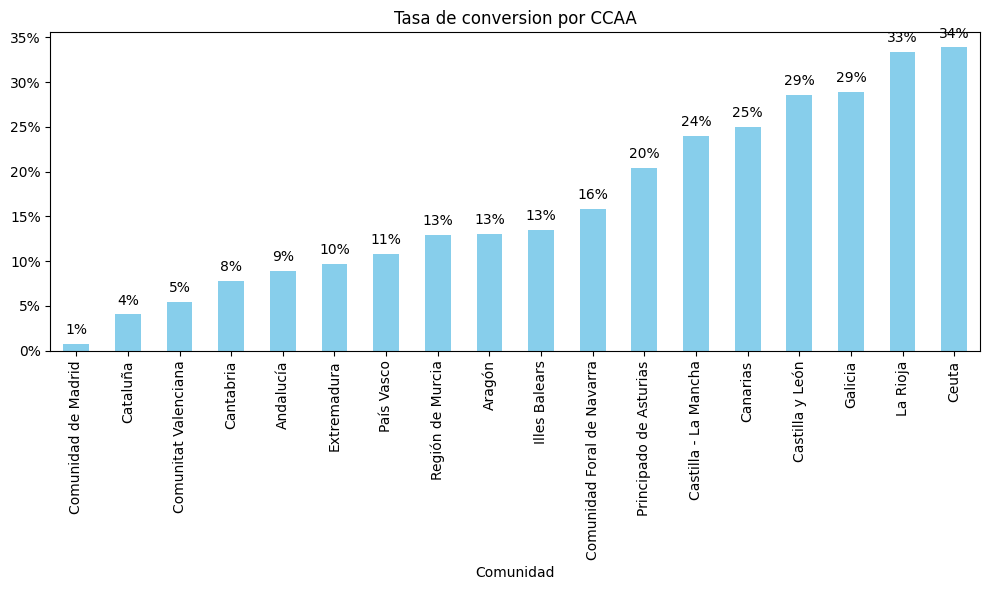

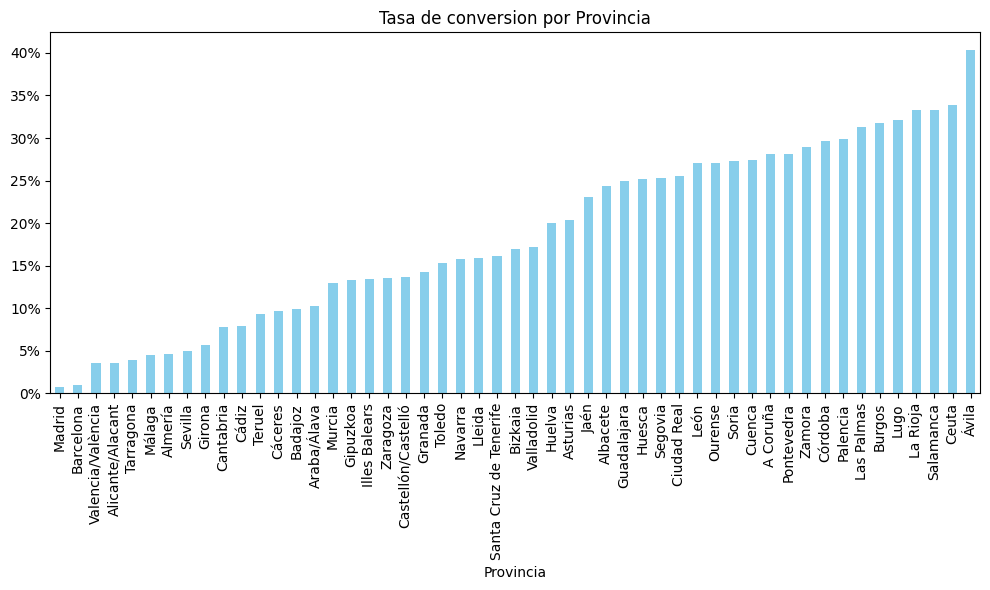

In [30]:
def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)

# Comparación por CCAA
plt.figure(figsize=(10, 6))  
ax = ccaa_cv['Tasa de conversion'].sort_values().plot.bar(title='Tasa de conversion por CCAA', color='skyblue')
ax.yaxis.set_major_formatter(formatter)

# Añadir etiquetas de porcentaje encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Comparación por Provincias
plt.figure(figsize=(10, 6))  
ax = provincia_cv['Tasa de conversion'].sort_values().plot.bar(title='Tasa de conversion por Provincia', color='skyblue')
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Tasa de conversión en el 2024

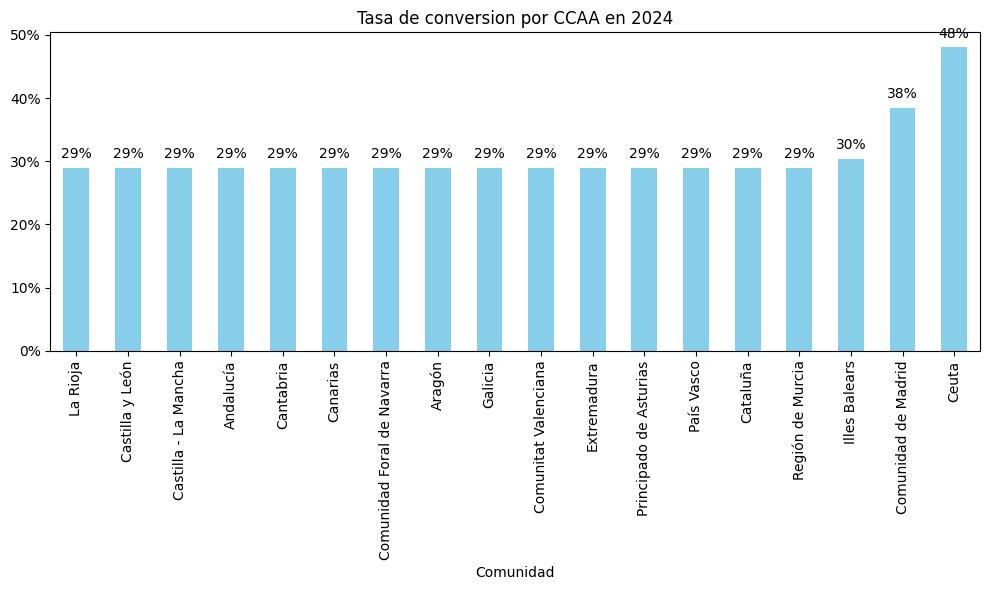

In [31]:
# Filtrar datos solo para el año 2024
df_2024 = df.query('Year == 2024')

# Agrupar por CCAA 
ccaa_cv_2024 = df_2024.groupby('Comunidad')[['Tasa de conversion']].median()

# Agrupar por Provincias 
provincia_cv_2024 = df_2024.groupby('Provincia')[['Tasa de conversion']].median()

def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)

# Comparación por CCAA
plt.figure(figsize=(10, 6))  
ax = ccaa_cv_2024['Tasa de conversion'].sort_values().plot.bar(title='Tasa de conversion por CCAA en 2024', color='skyblue')
ax.yaxis.set_major_formatter(formatter)

# Añadir etiquetas de porcentaje encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


VS Tasa de conversion del 2023

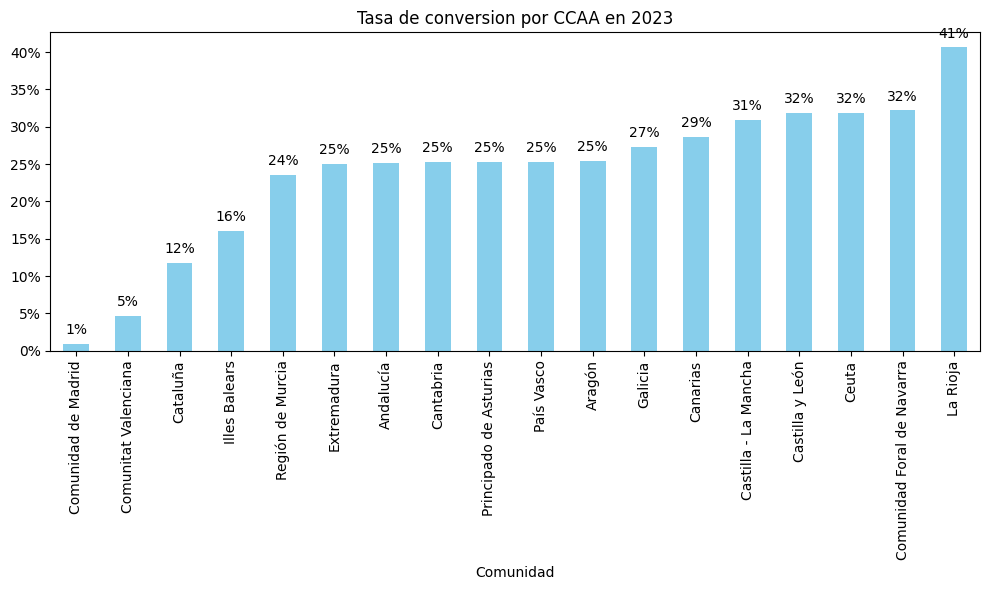

In [32]:
# Filtrar datos solo para el año 2023
df_2023 = df.query('Year == 2023')

# Agrupar por CCAA 
ccaa_cv_2023 = df_2023.groupby('Comunidad')[['Tasa de conversion']].median()

# Agrupar por Provincias 
provincia_cv_2023 = df_2023.groupby('Provincia')[['Tasa de conversion']].median()

def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)

# Comparación por CCAA
plt.figure(figsize=(10, 6))  
ax = ccaa_cv_2023['Tasa de conversion'].sort_values().plot.bar(title='Tasa de conversion por CCAA en 2023', color='skyblue')
ax.yaxis.set_major_formatter(formatter)

# Añadir etiquetas de porcentaje encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### ¿Que provicia y CCAA tiene el precio medio mas alto?

In [33]:
# Agrupar por CCAA 
ccaa_pme = df.groupby('Comunidad')[['Precio medio']].mean()

# Agrupar por Provincias 
provincia_pme = df.groupby('Provincia')[['Precio medio']].mean()

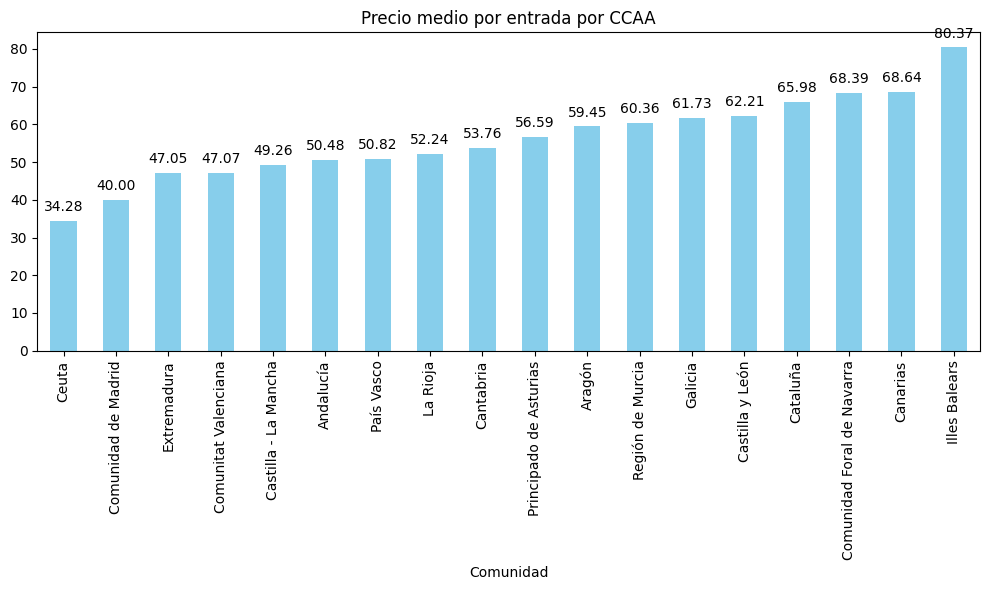

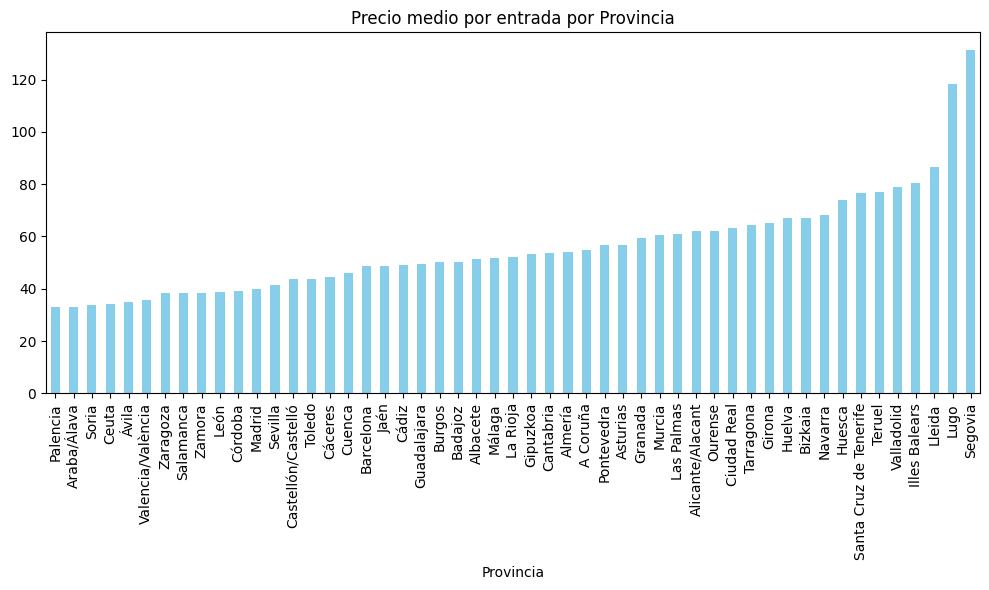

In [34]:
plt.figure(figsize=(10, 6))  

ax = ccaa_pme['Precio medio'].sort_values().plot.bar( title='Precio medio por entrada por CCAA', color='skyblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Comparación por Provincias
plt.figure(figsize=(10, 6))  

provincia_pme['Precio medio'].sort_values().plot.bar( title='Precio medio por entrada por Provincia', color='skyblue')

    
plt.tight_layout()
plt.show()

Precio medio en el 2024

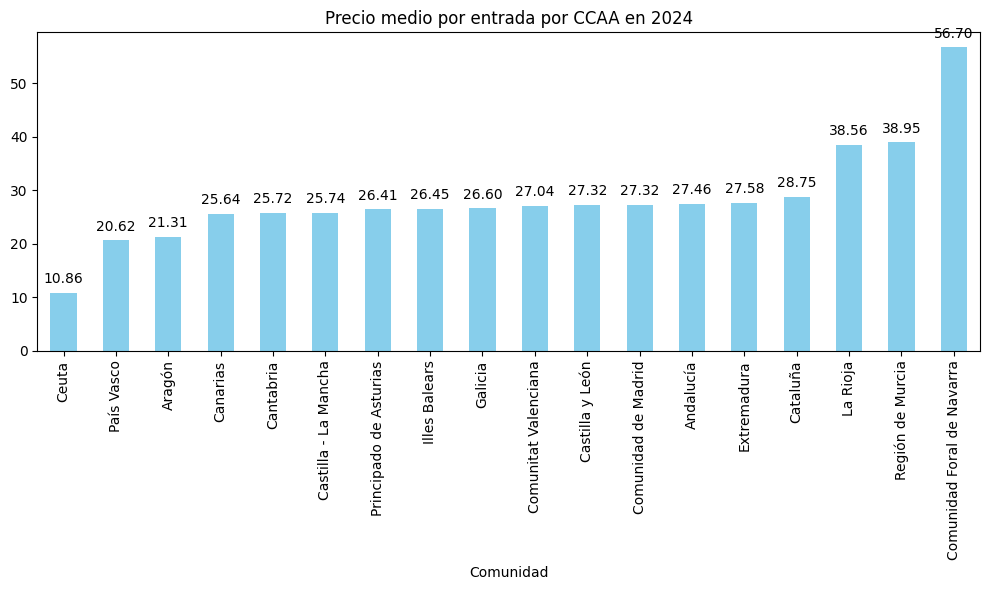

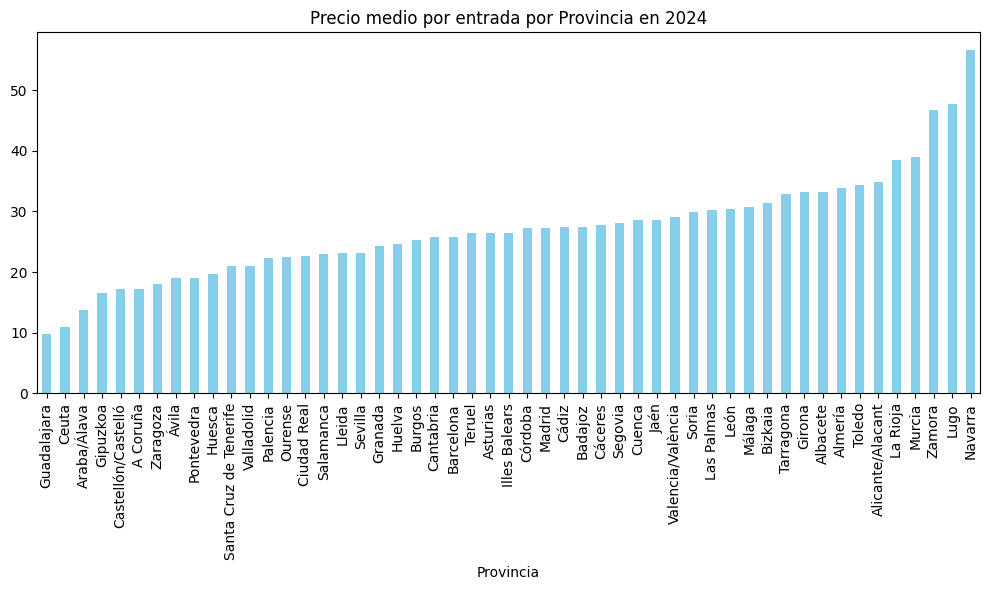

In [35]:
# Filtrar datos solo para el año 2024
df_2024 = df.query('Year == 2024')

# Agrupar por CCAA 
ccaa_pme_2024 = df_2024.groupby('Comunidad')[['Precio medio']].mean()

# Agrupar por Provincias 
provincia_pme_2024 = df_2024.groupby('Provincia')[['Precio medio']].mean()

plt.figure(figsize=(10, 6))  
ax = ccaa_pme_2024['Precio medio'].sort_values().plot.bar(title='Precio medio por entrada por CCAA en 2024', color='skyblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Comparación por Provincias
plt.figure(figsize=(10, 6))  
provincia_pme_2024['Precio medio'].sort_values().plot.bar(title='Precio medio por entrada por Provincia en 2024', color='skyblue')

plt.tight_layout()
plt.show()


VS Precio medio en el 2023

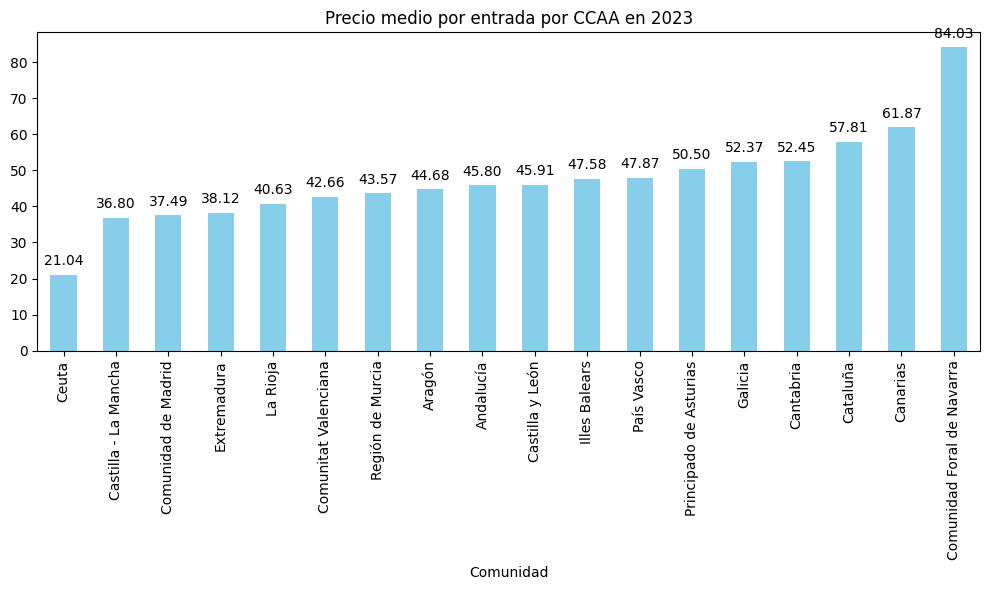

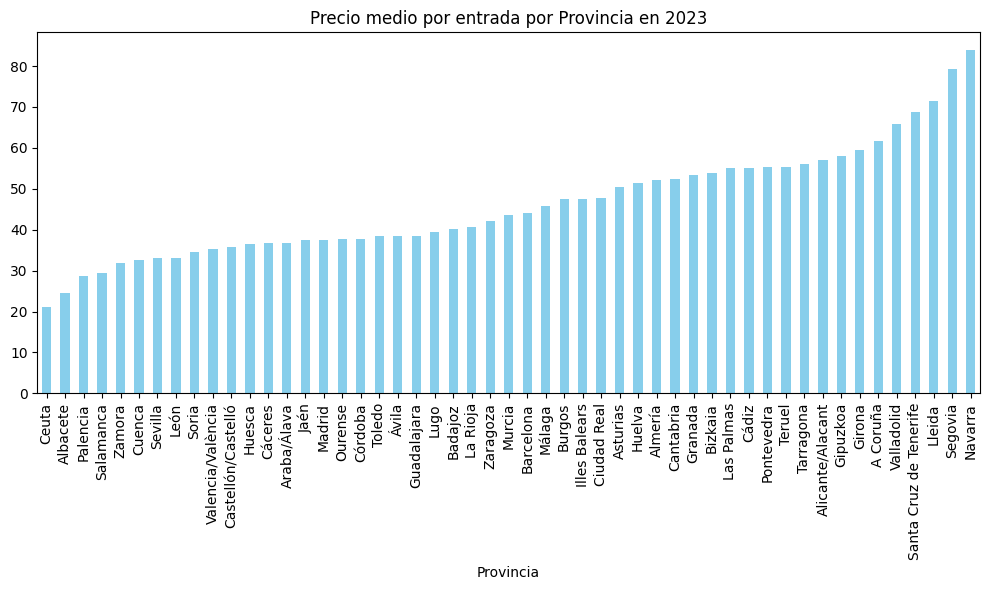

In [36]:
# Filtrar datos solo para el año 2024
df_2023 = df.query('Year == 2023')

# Agrupar por CCAA 
ccaa_pme_2023 = df_2023.groupby('Comunidad')[['Precio medio']].mean()

# Agrupar por Provincias 
provincia_pme_2023 = df_2023.groupby('Provincia')[['Precio medio']].mean()

plt.figure(figsize=(10, 6))  
ax = ccaa_pme_2023['Precio medio'].sort_values().plot.bar(title='Precio medio por entrada por CCAA en 2023', color='skyblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Comparación por Provincias
plt.figure(figsize=(10, 6))  
provincia_pme_2023['Precio medio'].sort_values().plot.bar(title='Precio medio por entrada por Provincia en 2023', color='skyblue')

plt.tight_layout()
plt.show()


## Análisis de Correlación
- Correlación entre variables: Calcula la correlación entre diferentes variables numéricas para identificar relaciones importantes.

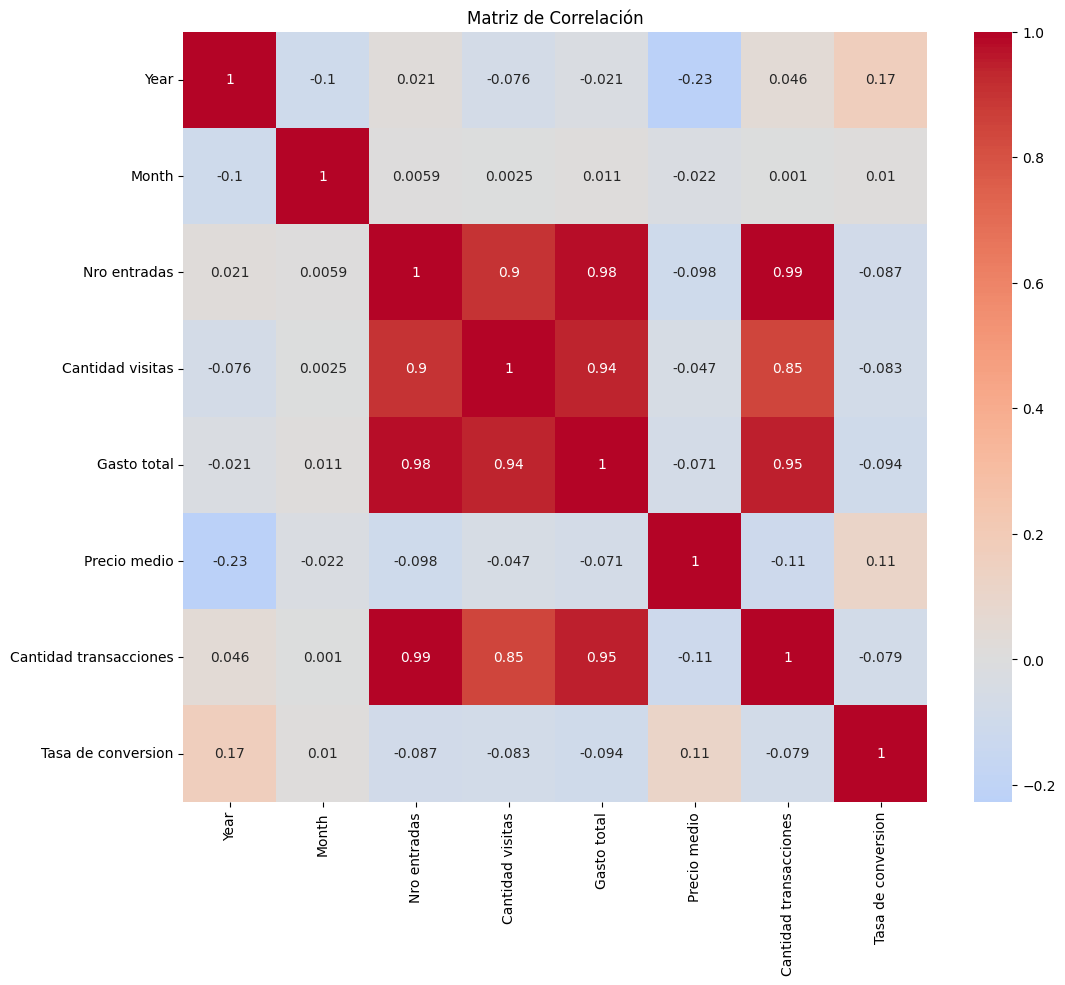

In [37]:
# Filtrar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = numerical_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

*Hay una correlación alta y positiva entre nro de entradas y gasto total, nro de entradas y cantidad de transacciones y gasto total con la cantidad de transacciones.*

In [38]:
ocioagrupado = pd.read_csv("ocio_españa_limpio_agrupado.csv")

In [39]:
df_agrupada = ocioagrupado.copy()

In [40]:
lista_columnas = ['Nro entradas','Cantidad visitas', 'Gasto total', 'Precio medio','Cantidad transacciones', 'Tasa de conversion']

for i in lista_columnas:
    for j in lista_columnas:
        if i != j:  
            corr_columnas = df_agrupada[i].corr(df_agrupada[j], method='kendall')
            if corr_columnas >= 0.5:
                print(f"Correlación entre {i} y {j}: {corr_columnas}")

Correlación entre Nro entradas y Cantidad visitas: 0.8338731032511779
Correlación entre Nro entradas y Gasto total: 0.9095344981475181
Correlación entre Nro entradas y Cantidad transacciones: 0.9521555642051954
Correlación entre Cantidad visitas y Nro entradas: 0.8338731032511778
Correlación entre Cantidad visitas y Gasto total: 0.8276542970094153
Correlación entre Cantidad visitas y Cantidad transacciones: 0.8195583881658624
Correlación entre Gasto total y Nro entradas: 0.9095344981475182
Correlación entre Gasto total y Cantidad visitas: 0.8276542970094154
Correlación entre Gasto total y Cantidad transacciones: 0.883930703046231
Correlación entre Cantidad transacciones y Nro entradas: 0.9521555642051954
Correlación entre Cantidad transacciones y Cantidad visitas: 0.8195583881658624
Correlación entre Cantidad transacciones y Gasto total: 0.883930703046231


*Utilizamos matplotlib para representar con un gráfico de dispersión*

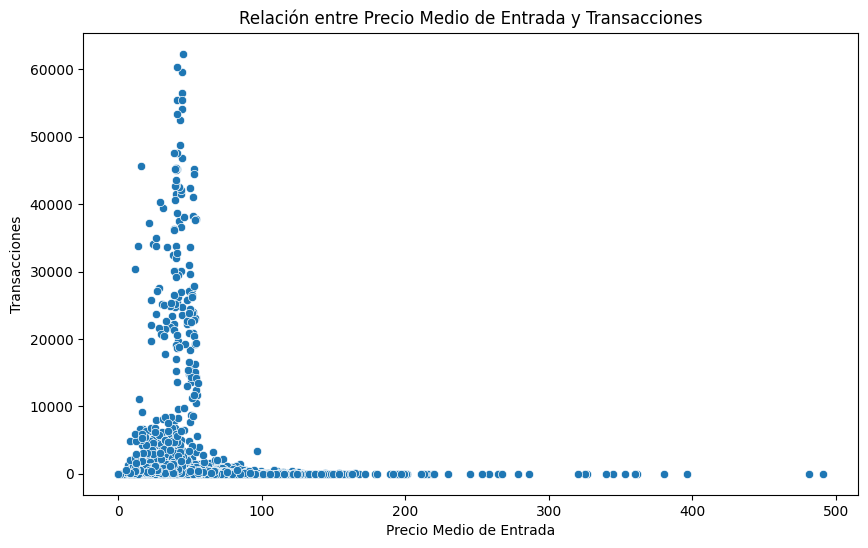

In [41]:
# Crear un diagrama de dispersión para analizar la relación entre Precio medio y cantidad de transacciones

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Precio medio', y='Cantidad transacciones')
plt.title('Relación entre Precio Medio de Entrada y Transacciones')
plt.xlabel('Precio Medio de Entrada')
plt.ylabel('Transacciones')
plt.show()

En la gráfica se observa que la mayor cantidad de transacciones generadas en total se encuentran en el rango de 0-100 de precio medio por entrada a las atracciones.

##  Gráfica de rectas para ver la relación entre Nro entradas y otras variables

In [42]:

# 'Año' y 'Mes' estén en formato numérico
df_agrupada['Año'] = pd.to_numeric(df_agrupada['Año'])
df_agrupada['Mes'] = pd.to_numeric(df_agrupada['Mes'])

# Filtrar los TOP 3 por mayor número de entradas en 2024
df_top10_2024 = df_agrupada[df_agrupada['Año'] == 2024].nlargest(10, 'Nro entradas')
top3_comunidades = df_top10_2024['Comunidad'].unique()[:3]

dfs = []

for comunidad in top3_comunidades:
    df_comunidad = df_agrupada[df_agrupada['Comunidad'] == comunidad]
    
    # Agrupar por 'Año' y 'Mes' y sumar 'Nro entradas'
    df_comunidad_agrupada = df_comunidad.groupby(['Año', 'Mes']).agg({'Nro entradas': 'sum'}).reset_index()
    
    # Crear una columna de fecha combinando 'Año' y 'Mes'
    df_comunidad_agrupada['Fecha'] = pd.to_datetime(df_comunidad_agrupada['Año'].astype(str) + '-' + df_comunidad_agrupada['Mes'].astype(str).str.zfill(2) + '-01')
    
    # Ordenar los datos por fecha
    df_comunidad_agrupada = df_comunidad_agrupada.sort_values(by='Fecha')
    
    # Interpolar datos faltantes
    df_comunidad_agrupada['Nro entradas'] = df_comunidad_agrupada['Nro entradas'].interpolate()
    
    # Añadir una columna para identificar la comunidad
    df_comunidad_agrupada['Comunidad'] = comunidad
    
    # Añadir el DataFrame de la comunidad a la lista
    dfs.append(df_comunidad_agrupada)

# Concatenar todos los DataFrames en uno solo
df_combinado = pd.concat(dfs)

# Crear el gráfico combinado
fig = px.line(
    data_frame=df_combinado,
    x='Fecha',
    y='Nro entradas',
    color='Comunidad',
    title='Nro de Entradas por Mes y Año para las 3 Principales Comunidades en 2024',
    height=500
)

# Añadir línea vertical en el año 2020 usando add_shape
fig.add_shape(
    type="line",
    x0=pd.to_datetime("2020-01-01"),
    x1=pd.to_datetime("2020-01-01"),
    y0=df_combinado['Nro entradas'].min(),
    y1=df_combinado['Nro entradas'].max(),
    line=dict(color="Red", dash="dash"),
    name="Covid"
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Nro de Entradas',
    legend_title='Comunidad'
)

fig.show()


In [43]:

# 'Año' y 'Mes' estén en formato numérico
df_agrupada['Año'] = pd.to_numeric(df_agrupada['Año'])
df_agrupada['Mes'] = pd.to_numeric(df_agrupada['Mes'])

# Filtrar los TOP 3 por mayor 'Gasto total' en 2024
df_top10_2024 = df_agrupada[df_agrupada['Año'] == 2024].nlargest(10, 'Gasto total')
top3_comunidades = df_top10_2024['Comunidad'].unique()[:3]

dfs = []

for comunidad in top3_comunidades:
    df_comunidad = df_agrupada[df_agrupada['Comunidad'] == comunidad]
    
    # Agrupar por 'Año' y 'Mes' y sumar 'Gasto total'
    df_comunidad_agrupada = df_comunidad.groupby(['Año', 'Mes']).agg({'Gasto total': 'sum'}).reset_index()
    
    # Crear una columna de fecha combinando 'Año' y 'Mes'
    df_comunidad_agrupada['Fecha'] = pd.to_datetime(df_comunidad_agrupada['Año'].astype(str) + '-' + df_comunidad_agrupada['Mes'].astype(str).str.zfill(2) + '-01')
    
    # Ordenar los datos por fecha
    df_comunidad_agrupada = df_comunidad_agrupada.sort_values(by='Fecha')
    
    # Interpolar datos faltantes
    df_comunidad_agrupada['Gasto total'] = df_comunidad_agrupada['Gasto total'].interpolate()
    
    # Añadir una columna para identificar la comunidad
    df_comunidad_agrupada['Comunidad'] = comunidad
    
    # Añadir el DataFrame de la comunidad a la lista
    dfs.append(df_comunidad_agrupada)

# Concatenar todos los DataFrames en uno solo
df_combinado = pd.concat(dfs)

# Crear el gráfico combinado
fig = px.line(
    data_frame=df_combinado,
    x='Fecha',
    y='Gasto total',
    color='Comunidad',
    title='Gasto Total por Mes y Año para las 3 Principales Comunidades en 2024',
    height=500
)

# Añadir línea vertical en el año 2020 usando add_shape
fig.add_shape(
    type="line",
    x0=pd.to_datetime("2020-01-01"),
    x1=pd.to_datetime("2020-01-01"),
    y0=df_combinado['Gasto total'].min(),
    y1=df_combinado['Gasto total'].max(),
    line=dict(color="Red", dash="dash"),
    name="Covid"
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Gasto Total',
    legend_title='Comunidad'
)

fig.show()
